# RFM ANALYSIS FOR CUSTOMER SEGMENTATION

#### RFM : Recency Frequency Monetary

RFM analysis stands for Recency, Frequency, and Monetary Value. It’s a way of segmenting customers based on when they last purchased, how often they’ve purchased, and how much they’ve spent in total. 

Along with Customer Lifetime Value (CLV), RFM analysis is a popular segmentation methodology used by businesses to understand who their best customers are based on their purchase history and customer behavior. 

#### Recency
Recency is when a customer made their last purchase. Recent customers are typically more engaged than ones who last bought a year ago.
#### Frequency 
Frequency is the total number of times a customer has bought from your brand in the chosen time period. A customer who buys six times from you in eight months is likely to be more valuable than a customer who only buys once.
#### Monetary 
Monetary Value is the total amount of money a customer spends within your chosen time frame. A customer who spends more is worth more to your business than a customer who only buys low-cost products. 

The RFM model assigns a value to each customer based on how they score in each category and combines them to make an RFM score. You can then market to those customer segments separately, with bespoke offers and messaging. 

# Importing the Data and Data Cleaning Process

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\\Users\\91961\\OneDrive\\Desktop\\sales_data.xlsx")

In [3]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [4]:
df.shape


(5000, 40)

In [5]:
df.columns.values

array(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS',
       'SUNDAY_ORDERS', 'MONDAY_REVENUE', 'TUESDAY_REVENUE',
       'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE',
       'SATURDAY_REVENUE', 'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'], dtyp

In [6]:
df.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [7]:
df.dtypes

CustomerID                            int64
TOTAL_ORDERS                          int64
REVENUE                             float64
AVERAGE_ORDER_VALUE                 float64
CARRIAGE_REVENUE                    float64
AVERAGESHIPPING                     float64
FIRST_ORDER_DATE             datetime64[ns]
LATEST_ORDER_DATE            datetime64[ns]
AVGDAYSBETWEENORDERS                float64
DAYSSINCELASTORDER                    int64
MONDAY_ORDERS                         int64
TUESDAY_ORDERS                        int64
WEDNESDAY_ORDERS                      int64
THURSDAY_ORDERS                       int64
FRIDAY_ORDERS                         int64
SATURDAY_ORDERS                       int64
SUNDAY_ORDERS                         int64
MONDAY_REVENUE                      float64
TUESDAY_REVENUE                     float64
WEDNESDAY_REVENUE                   float64
THURSDAY_REVENUE                    float64
FRIDAY_REVENUE                      float64
SATURDAY_REVENUE                

In [8]:
df.head(10)

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
5,153,49,5841.24,119.21,96.84,1.98,2015-07-26,2021-10-24,46.57,1,...,1595.97,1447.96,0,20,23,6,0.00,2482.33,2759.43,599.48
6,187,43,5470.27,127.22,128.77,2.99,2019-01-14,2021-10-24,23.58,1,...,2042.31,2699.47,2,0,19,22,47.00,0.00,2578.28,2844.99
7,219,54,5200.53,96.31,237.53,4.40,2019-11-19,2021-10-24,13.06,1,...,754.72,1339.16,2,22,24,6,273.18,2328.21,1980.99,618.15
8,258,19,4967.06,261.42,51.91,2.73,2021-03-03,2021-10-24,12.37,1,...,2588.19,563.74,1,0,8,10,332.19,0.00,1673.10,2961.77
9,308,21,4726.38,225.07,63.88,3.04,2020-01-06,2021-10-24,31.29,1,...,1094.98,991.97,4,11,6,0,1095.98,1867.94,1762.46,0.00


In [9]:
df1=df.drop(["CustomerID","FIRST_ORDER_DATE","LATEST_ORDER_DATE"],axis=1)


In [10]:
df1.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,29,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,10,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,3,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,5,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,8,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


Text(0.5, 1.0, 'Heatmap for sales data')

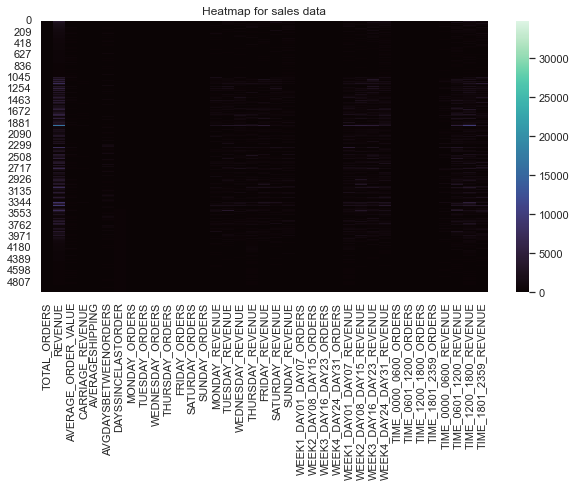

In [11]:
import seaborn as sns
sns.set_theme()
sns.color_palette("mako", as_cmap=True)
fig,ab=plt.subplots(figsize=(10,5))
sns.heatmap(df1,cmap='mako')
ab.set_title('Heatmap for sales data')

<AxesSubplot:>

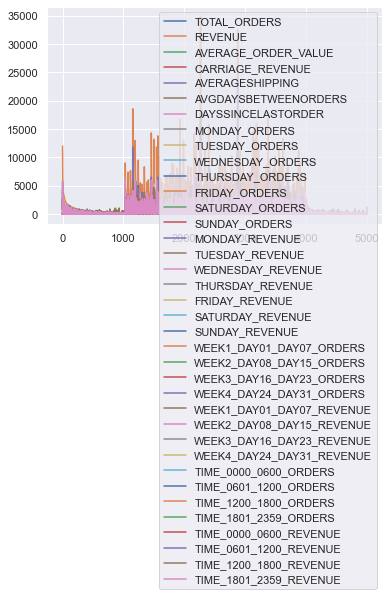

In [12]:
df1.plot()

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [15]:
df["FIRST_ORDER_DATE"].unique()

array(['2016-12-30T00:00:00.000000000', '2018-03-31T00:00:00.000000000',
       '2017-11-30T00:00:00.000000000', ...,
       '2021-03-16T00:00:00.000000000', '2018-03-23T00:00:00.000000000',
       '2020-07-03T00:00:00.000000000'], dtype='datetime64[ns]')

Carriage is the cost that a person incurs for transporting goods or raw materials from one place to another. It could be the cost that a supplier incurs for transporting the goods to the buyer or the cost that a company incurs for transporting a product to a customer. So we can assume till that carriage revenue would not affect the customer behaviour to the products as h. So we can drop this column, and average shipping as well.


In [16]:
df2=df1.drop(["CARRIAGE_REVENUE","AVERAGESHIPPING"],axis=1)
df2.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,124,11986.54,96.67,14.19,1,13,13,29,25,19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,82,11025.96,134.46,15.89,1,11,13,10,13,14,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,43,7259.69,168.83,33.12,1,5,4,3,5,5,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,44,6992.27,158.92,21.11,1,10,8,5,8,5,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,55,6263.44,113.88,6.65,1,2,3,8,8,12,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [17]:
df2.filter(like='TIME_').isnull().sum()

TIME_0000_0600_ORDERS     0
TIME_0601_1200_ORDERS     0
TIME_1200_1800_ORDERS     0
TIME_1801_2359_ORDERS     0
TIME_0000_0600_REVENUE    0
TIME_0601_1200_REVENUE    0
TIME_1200_1800_REVENUE    0
TIME_1801_2359_REVENUE    0
dtype: int64

In [18]:
df3=df2.drop((df2.filter(like='TIME_')),axis=1)
df3.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,124,11986.54,96.67,14.19,1,13,13,29,25,19,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,82,11025.96,134.46,15.89,1,11,13,10,13,14,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,43,7259.69,168.83,33.12,1,5,4,3,5,5,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,44,6992.27,158.92,21.11,1,10,8,5,8,5,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,55,6263.44,113.88,6.65,1,2,3,8,8,12,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


In [19]:
df3["MONTHLY_ORDERS"]=df3[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum(axis=1)
df3.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,...,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,MONTHLY_ORDERS
0,124,11986.54,96.67,14.19,1,13,13,29,25,19,...,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,124
1,82,11025.96,134.46,15.89,1,11,13,10,13,14,...,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,82
2,43,7259.69,168.83,33.12,1,5,4,3,5,5,...,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,43
3,44,6992.27,158.92,21.11,1,10,8,5,8,5,...,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,44
4,55,6263.44,113.88,6.65,1,2,3,8,8,12,...,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,55


In [20]:
df3["MONTHLY_REVENUE"]=df3[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum(axis=1)
df3.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,...,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,MONTHLY_ORDERS,MONTHLY_REVENUE
0,124,11986.54,96.67,14.19,1,13,13,29,25,19,...,28,42,30,24,2685.37,4299.28,2592.18,2409.71,124,11986.54
1,82,11025.96,134.46,15.89,1,11,13,10,13,14,...,18,19,19,26,1336.09,2776.02,2807.66,4106.19,82,11025.96
2,43,7259.69,168.83,33.12,1,5,4,3,5,5,...,9,11,6,17,2299.93,1383.92,713.94,2861.90,43,7259.69
3,44,6992.27,158.92,21.11,1,10,8,5,8,5,...,12,15,9,8,2317.95,2417.22,997.02,1260.08,44,6992.27
4,55,6263.44,113.88,6.65,1,2,3,8,8,12,...,10,18,21,6,831.14,1938.18,2725.66,768.46,55,6263.44


In [21]:
df4=df3.drop(["WEEK1_DAY01_DAY07_ORDERS","WEEK2_DAY08_DAY15_ORDERS","WEEK3_DAY16_DAY23_ORDERS","WEEK4_DAY24_DAY31_ORDERS","WEEK1_DAY01_DAY07_REVENUE","WEEK2_DAY08_DAY15_REVENUE","WEEK3_DAY16_DAY23_REVENUE","WEEK4_DAY24_DAY31_REVENUE"],axis=1)
df4.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,...,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,MONTHLY_ORDERS,MONTHLY_REVENUE
0,124,11986.54,96.67,14.19,1,13,13,29,25,19,...,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,124,11986.54
1,82,11025.96,134.46,15.89,1,11,13,10,13,14,...,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,82,11025.96
2,43,7259.69,168.83,33.12,1,5,4,3,5,5,...,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,43,7259.69
3,44,6992.27,158.92,21.11,1,10,8,5,8,5,...,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,44,6992.27
4,55,6263.44,113.88,6.65,1,2,3,8,8,12,...,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,55,6263.44


In [22]:
df5=df4.drop((df4.filter(like='DAY_ORDERS')),axis=1)
df5.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,MONTHLY_ORDERS,MONTHLY_REVENUE
0,124,11986.54,96.67,14.19,1,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,124,11986.54
1,82,11025.96,134.46,15.89,1,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,82,11025.96
2,43,7259.69,168.83,33.12,1,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,43,7259.69
3,44,6992.27,158.92,21.11,1,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,44,6992.27
4,55,6263.44,113.88,6.65,1,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,55,6263.44


In [23]:
df6=df5.drop((df5.filter(like='DAY_REVENUE')),axis=1)
df6.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONTHLY_ORDERS,MONTHLY_REVENUE
0,124,11986.54,96.67,14.19,1,124,11986.54
1,82,11025.96,134.46,15.89,1,82,11025.96
2,43,7259.69,168.83,33.12,1,43,7259.69
3,44,6992.27,158.92,21.11,1,44,6992.27
4,55,6263.44,113.88,6.65,1,55,6263.44


In [24]:
df6["CustomerID"]=df["CustomerID"]
df6["FIRST_ORDER_DATE"]=df["FIRST_ORDER_DATE"]
df6["LATEST_ORDER_DATE"]=df["LATEST_ORDER_DATE"]
df6.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONTHLY_ORDERS,MONTHLY_REVENUE,CustomerID,FIRST_ORDER_DATE,LATEST_ORDER_DATE
0,124,11986.54,96.67,14.19,1,124,11986.54,22,2016-12-30,2021-10-24
1,82,11025.96,134.46,15.89,1,82,11025.96,29,2018-03-31,2021-10-24
2,43,7259.69,168.83,33.12,1,43,7259.69,83,2017-11-30,2021-10-24
3,44,6992.27,158.92,21.11,1,44,6992.27,95,2019-04-09,2021-10-24
4,55,6263.44,113.88,6.65,1,55,6263.44,124,2020-10-23,2021-10-24


## OUTLIERS DETECTION AND REMOVAL

In [25]:
def plot_hist(df,column_name):
    y=column_name
    ax = df[y].plot.hist(bins=50, alpha=0.5)
    plt.title("checking for normlality")
    plt.legend()

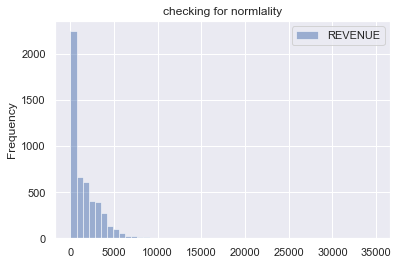

In [26]:
plot_hist(df6,"REVENUE")

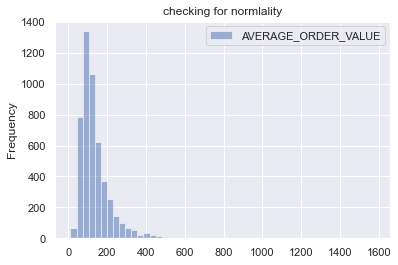

In [27]:
plot_hist(df6,"AVERAGE_ORDER_VALUE")

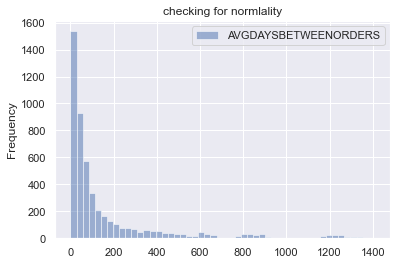

In [28]:
plot_hist(df6,"AVGDAYSBETWEENORDERS")

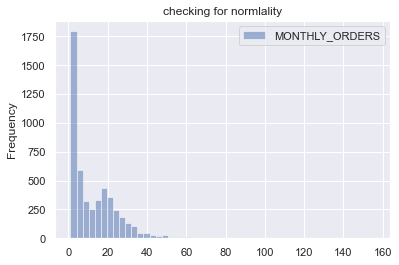

In [29]:
plot_hist(df6,"MONTHLY_ORDERS")

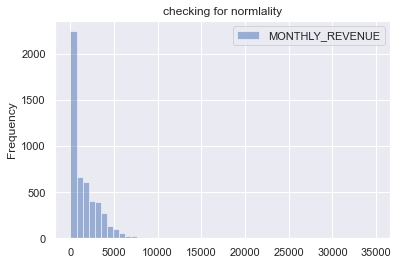

In [30]:
plot_hist(df6,"MONTHLY_REVENUE")

Since, we can see almost all the columns show noramlity with right skewed. However in some columns outliers also be seen lets check it with plottitng boxplot.

In [31]:
def plot_boxplot(df,column_name):
    y=column_name
    ax=df.boxplot([y])
    plt.title("checking for outliers")
    plt.legend()

    
def scatter_plot(df,column1,column2):
    ax=df.plot.scatter(x=column1,y=column2,title= "Scatter plot")
    plt.show()
    plt.legend()

No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


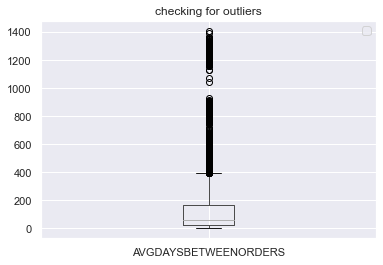

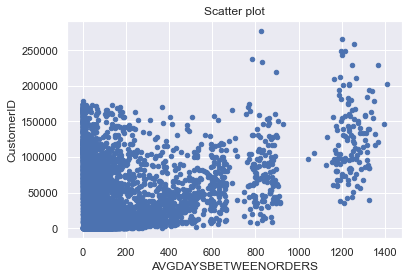

No handles with labels found to put in legend.


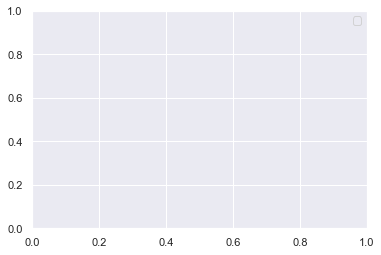

In [32]:
plot_boxplot(df6,"AVGDAYSBETWEENORDERS")
scatter_plot(df6,"AVGDAYSBETWEENORDERS","CustomerID")

In [33]:
Q1 = np.percentile(df6['AVGDAYSBETWEENORDERS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df6['AVGDAYSBETWEENORDERS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df6.shape)
 
# Upper bound
upper = np.where(df6['AVGDAYSBETWEENORDERS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df6['AVGDAYSBETWEENORDERS'] <= (Q1-1.5*IQR))
 
#''' Removing the Outliers '''
df6.drop(upper[0], inplace = True)
df6.drop(lower[0], inplace = True)
print("New Shape: ", df6.shape)

Old Shape:  (5000, 10)
New Shape:  (4368, 10)


No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


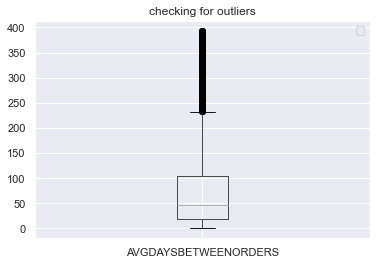

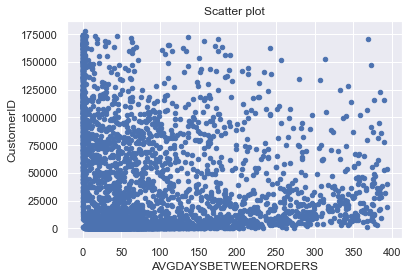

No handles with labels found to put in legend.


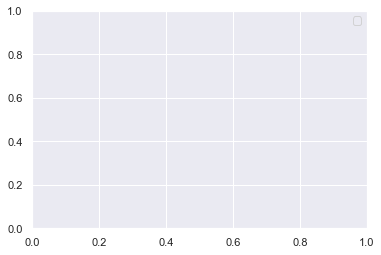

In [34]:
plot_boxplot(df6,"AVGDAYSBETWEENORDERS")
scatter_plot(df6,"AVGDAYSBETWEENORDERS","CustomerID")

Let's check the unique for no. of days since last order.

In [35]:
df6["DAYSSINCELASTORDER"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


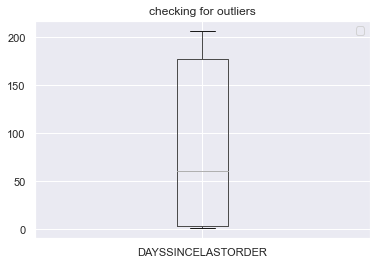

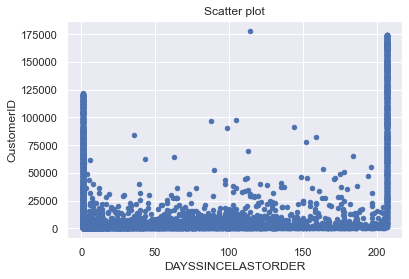

No handles with labels found to put in legend.


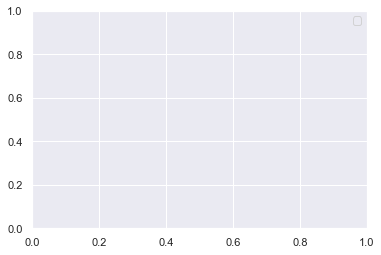

In [36]:
#checking outliers for Dayssincelastorder column.
plot_boxplot(df6,"DAYSSINCELASTORDER")
scatter_plot(df6,"DAYSSINCELASTORDER","CustomerID")

Through the plot we find out there are no outliers for this column(Days since last order).
now we can calculate RFM scores and modeling 

# Calculating RFM scoring and modelling

In [37]:
#Recency=how recent the customer orders,i.e(latest date-last order date),from data we observe that,dayssincelastorder column providing the same info., so we can take it as recency.
#Frequency=how frequent are the customers buying i.e(Monthly_orders/no.of days(30))
#Monetary=how much sales customers are making i.e(Revenue/30)
df6['Recency']=((df6['DAYSSINCELASTORDER']))
df6['Frequency']=(df6['TOTAL_ORDERS']/30)
df6['Monetary']=((df6['REVENUE']/30))

In [38]:
df6.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONTHLY_ORDERS,MONTHLY_REVENUE,CustomerID,FIRST_ORDER_DATE,LATEST_ORDER_DATE,Recency,Frequency,Monetary
0,124,11986.54,96.67,14.19,1,124,11986.54,22,2016-12-30,2021-10-24,1,4.133333,399.551333
1,82,11025.96,134.46,15.89,1,82,11025.96,29,2018-03-31,2021-10-24,1,2.733333,367.532000
2,43,7259.69,168.83,33.12,1,43,7259.69,83,2017-11-30,2021-10-24,1,1.433333,241.989667
3,44,6992.27,158.92,21.11,1,44,6992.27,95,2019-04-09,2021-10-24,1,1.466667,233.075667
4,55,6263.44,113.88,6.65,1,55,6263.44,124,2020-10-23,2021-10-24,1,1.833333,208.781333


In [39]:
#Since, we calculated RFM scores,so making a seperate dataframe as RFMscores to describe recency, frequency, monetary groupby CustomerID.
RFMScores=pd.DataFrame({'CustomerID':df6['CustomerID'],'Recency':df6['Recency'],'Frequency':df6['Frequency'],'Monetary':df6['Monetary']})
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary
0,22,1,4.133333,399.551333
1,29,1,2.733333,367.532000
2,83,1,1.433333,241.989667
3,95,1,1.466667,233.075667
4,124,1,1.833333,208.781333


In [40]:
RFMScores.groupby('CustomerID')
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary
0,22,1,4.133333,399.551333
1,29,1,2.733333,367.532000
2,83,1,1.433333,241.989667
3,95,1,1.466667,233.075667
4,124,1,1.833333,208.781333


In [41]:
#Descriptive Statistics(Recency)
RFMScores.Recency.describe()

count    4368.000000
mean       85.737637
std        81.950497
min         1.000000
25%         4.000000
50%        61.000000
75%       178.000000
max       207.000000
Name: Recency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


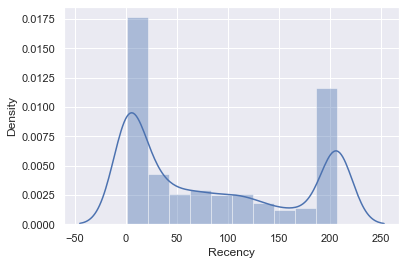

In [42]:
#Recency distribution plot
import seaborn as sns
x=RFMScores['Recency']
ax=sns.distplot(x)

In [43]:
#Descriptive Statistics(Frequency)
RFMScores.Frequency.describe()

count    4368.000000
mean        0.473619
std         0.434114
min         0.033333
25%         0.100000
50%         0.400000
75%         0.700000
max         5.200000
Name: Frequency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


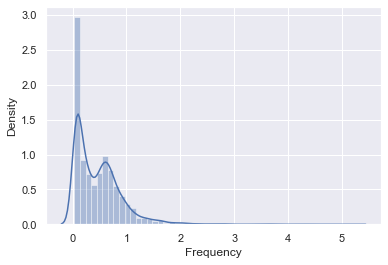

In [44]:
#Frequency distribution plot
import seaborn as sns
x=RFMScores['Frequency']
ax=sns.distplot(x)

In [45]:
#Descriptive Statistics(Monetary)
RFMScores.Monetary.describe()

count    4368.000000
mean       62.144748
std        69.092004
min         3.798333
25%        11.790833
50%        43.647667
75%        92.711000
max      1161.580000
Name: Monetary, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


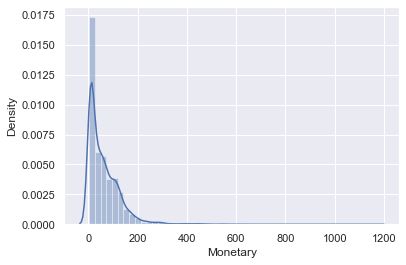

In [46]:
#Monetary distribution plot
import seaborn as sns
x=RFMScores['Monetary']
ax=sns.distplot(x)

Here we find out all our score for frequency, monetary are normally distributed and rightly skewed.

In [47]:
#Splitting into four segments using quantiles
quantiles=RFMScores.quantile(q=[0.25,0.50,0.75])
quantile=quantiles.to_dict()
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,1244.75,4.0,0.1,11.790833
0.50,7520.00,61.0,0.4,43.647667
0.75,62991.00,178.0,0.7,92.711000


In [48]:
#Functions to create R,F,M segments
def Rscoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FnMscoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [49]:
#Calculate Add R, F , M segment value columns in the existing dataset to show R,F,M segments
RFMScores['R']=RFMScores['Recency'].apply(Rscoring,args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FnMscoring,args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FnMscoring,args=('Monetary',quantiles))
RFMScores.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M
0,22,1,4.133333,399.551333,1,1,1
1,29,1,2.733333,367.532000,1,1,1
2,83,1,1.433333,241.989667,1,1,1
3,95,1,1.466667,233.075667,1,1,1
4,124,1,1.833333,208.781333,1,1,1


In [50]:
#Calculate and add RFMGroup value column showing combined concenated score of RFM
RFMScores['RFMGroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
#Calculate and add RFMScore value which is total of RFMGroup value
RFMScores['RFMScore']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,22,1,4.133333,399.551333,1,1,1,111,3
1,29,1,2.733333,367.532000,1,1,1,111,3
2,83,1,1.433333,241.989667,1,1,1,111,3
3,95,1,1.466667,233.075667,1,1,1,111,3
4,124,1,1.833333,208.781333,1,1,1,111,3


In [51]:
#Assign loyalty Level to each customer
Loyalty_Level=['Champions','Potential_Customers','Need_Attention']
Score_cuts=pd.qcut(RFMScores.RFMScore,q=3,labels=Loyalty_Level)
RFMScores['Loyalty_Level']=Score_cuts.values
RFMScores.reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level
0,0,22,1,4.133333,399.551333,1,1,1,111,3,Champions
1,1,29,1,2.733333,367.532000,1,1,1,111,3,Champions
2,2,83,1,1.433333,241.989667,1,1,1,111,3,Champions
3,3,95,1,1.466667,233.075667,1,1,1,111,3,Champions
4,4,124,1,1.833333,208.781333,1,1,1,111,3,Champions
5,5,153,1,1.633333,194.708000,1,1,1,111,3,Champions
6,6,187,1,1.433333,182.342333,1,1,1,111,3,Champions
7,7,219,1,1.800000,173.351000,1,1,1,111,3,Champions
8,8,258,1,0.633333,165.568667,1,2,1,121,4,Champions
9,9,308,1,0.700000,157.546000,1,2,1,121,4,Champions


In [52]:
#Validate the data for potential_customers 
RFMScores[RFMScores['Loyalty_Level']=='Potential_Customers'].sort_values('Monetary',ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level
0,2862,18,93,0.333333,431.333333,3,3,1,331,7,Potential_Customers
1,2776,32,87,0.333333,341.400000,3,3,1,331,7,Potential_Customers
2,2764,231,86,0.400000,171.315000,3,3,1,331,7,Potential_Customers
3,3809,266,178,0.200000,164.204667,3,3,1,331,7,Potential_Customers
4,2936,268,99,0.333333,164.001667,3,3,1,331,7,Potential_Customers
5,3541,307,146,0.366667,157.855333,3,3,1,331,7,Potential_Customers
6,2901,397,96,0.300000,141.422333,3,3,1,331,7,Potential_Customers
7,2474,403,67,0.400000,140.964000,3,3,1,331,7,Potential_Customers
8,3923,415,195,0.366667,139.633333,4,3,1,431,8,Potential_Customers
9,2939,430,99,0.300000,138.339000,3,3,1,331,7,Potential_Customers


In [53]:
#Validate the data for need_attention
RFMScores[RFMScores['Loyalty_Level']=='Need_Attention'].sort_values('Monetary',ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level
0,3836,2737,180,0.366667,67.914667,4,3,2,432,9,Need_Attention
1,4003,2928,207,0.366667,66.053000,4,3,2,432,9,Need_Attention
2,4004,3207,207,0.300000,63.457667,4,3,2,432,9,Need_Attention
3,4005,3572,207,0.266667,60.814667,4,3,2,432,9,Need_Attention
4,4006,3915,207,0.400000,58.289333,4,3,2,432,9,Need_Attention
5,3977,4498,204,0.400000,55.061667,4,3,2,432,9,Need_Attention
6,4008,4813,207,0.266667,53.398667,4,3,2,432,9,Need_Attention
7,4009,4912,207,0.166667,52.872333,4,3,2,432,9,Need_Attention
8,4010,4952,207,0.366667,52.700333,4,3,2,432,9,Need_Attention
9,4011,5234,207,0.166667,51.372667,4,3,2,432,9,Need_Attention


In [54]:
#Validate the data for RFM group 444
RFMScores[RFMScores['RFMGroup']=='444'].sort_values('Monetary',ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level
0,4290,63533,207,0.100000,11.699000,4,4,4,444,12,Need_Attention
1,4291,63974,207,0.100000,11.635667,4,4,4,444,12,Need_Attention
2,4293,64105,207,0.066667,11.619333,4,4,4,444,12,Need_Attention
3,4294,64185,207,0.100000,11.606000,4,4,4,444,12,Need_Attention
4,4295,64218,207,0.033333,11.600000,4,4,4,444,12,Need_Attention


In [55]:
#Validate the data for RFM group 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level
0,0,22,1,4.133333,399.551333,1,1,1,111,3,Champions
1,1,29,1,2.733333,367.532000,1,1,1,111,3,Champions
2,1030,41,2,1.466667,300.205000,1,1,1,111,3,Champions
3,1031,49,2,1.566667,290.383333,1,1,1,111,3,Champions
4,1115,75,4,1.800000,254.990333,1,1,1,111,3,Champions


# K Means Clustering (Visualising, Standardising, Modeling)

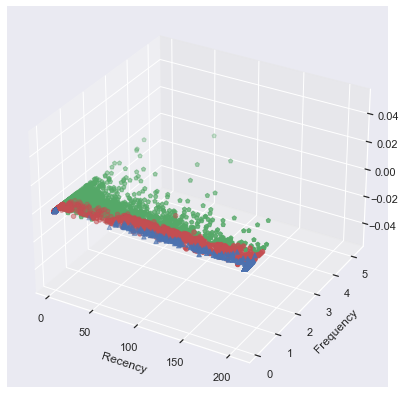

In [56]:
#Recency vs Frequency
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(projection='3d')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Need_Attention'")['Recency'],
              ys=RFMScores.query("Loyalty_Level=='Need_Attention'")['Frequency'],
               marker='^',
               c='b')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Recency'],
               ys=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Frequency'],
               marker='o',
               c='r')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Champions'")['Recency'],
               ys=RFMScores.query("Loyalty_Level=='Champions'")['Frequency'],
               marker='p',
               c='g')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')

    
plt.show()


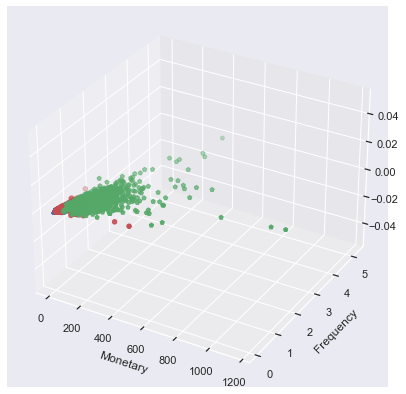

In [57]:
#Monetary vs Frequency
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(projection='3d')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Need_Attention'")['Monetary'],
              ys=RFMScores.query("Loyalty_Level=='Need_Attention'")['Frequency'],
               marker='^',
               c='b')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Monetary'],
               ys=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Frequency'],
               marker='o',
               c='r')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Champions'")['Monetary'],
               ys=RFMScores.query("Loyalty_Level=='Champions'")['Frequency'],
               marker='p',
               c='g')
ax1.set_xlabel('Monetary')
ax1.set_ylabel('Frequency')

    
plt.show()

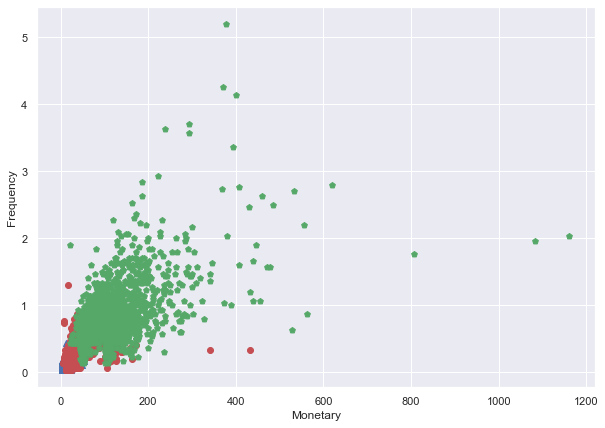

In [58]:
#Monetary vs Frequency
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot()
ax1.scatter(x=RFMScores.query("Loyalty_Level=='Need_Attention'")['Monetary'],
              y=RFMScores.query("Loyalty_Level=='Need_Attention'")['Frequency'],
               marker='^',
               c='b')
ax1.scatter(x=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Monetary'],
               y=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Frequency'],
               marker='o',
               c='r')
ax1.scatter(x=RFMScores.query("Loyalty_Level=='Champions'")['Monetary'],
               y=RFMScores.query("Loyalty_Level=='Champions'")['Frequency'],
               marker='p',
               c='g')
ax1.set_xlabel('Monetary')
ax1.set_ylabel('Frequency')

    
plt.show()

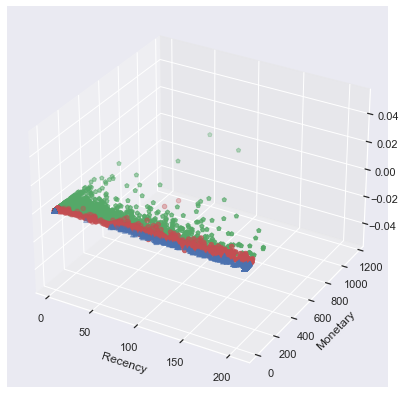

In [59]:
#Recency vs Monetary
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(projection='3d')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Need_Attention'")['Recency'],
              ys=RFMScores.query("Loyalty_Level=='Need_Attention'")['Monetary'],
               marker='^',
               c='b')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Recency'],
               ys=RFMScores.query("Loyalty_Level=='Potential_Customers'")['Monetary'],
               marker='o',
               c='r')
ax1.scatter3D(xs=RFMScores.query("Loyalty_Level=='Champions'")['Recency'],
               ys=RFMScores.query("Loyalty_Level=='Champions'")['Monetary'],
               marker='p',
               c='g')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')

    
plt.show()


In [60]:
#For checking normality for K-means Clustering
#Handle negetive and 0 values for handling infinites in log transformatiob for noramalisation
def handle_neg(num):
    if num<=0:
        return 1
    else:
        return num
#applying on recency and monetary
RFMScores['Recency']=[handle_neg(x) for x in RFMScores.Recency]
RFMScores['Monetary']=[handle_neg(x) for x in RFMScores.Monetary]
RFMScores['Frequency']=[handle_neg(x) for x in RFMScores.Frequency]

In [61]:
#Log transformation for normalisation
#Since Frequency is already normalised, so we will not apply transformation on that, as if doing so , frequency will contain negetive values.
Log_tfd_data=RFMScores[['Recency','Monetary']].apply(np.log,axis=1).round(3)
#Adding Frequency column in Log_tfd_data
Log_tfd_data['Frequency']=RFMScores['Frequency']



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


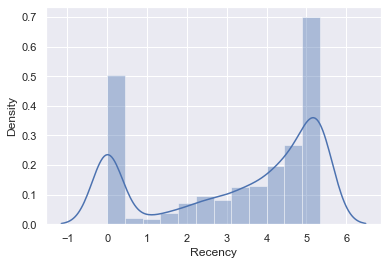

In [62]:
#Visualising data after normalisation for recency
Recency_plot=Log_tfd_data['Recency']
ax=sns.distplot(Recency_plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


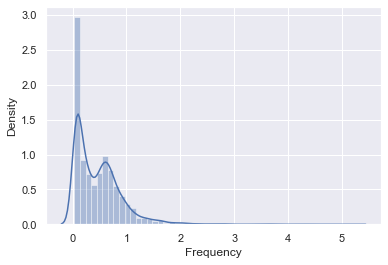

In [63]:
#Visualising data after normalisation for frequency
Frequency_plot=Log_tfd_data['Frequency']
ax=sns.distplot(Frequency_plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


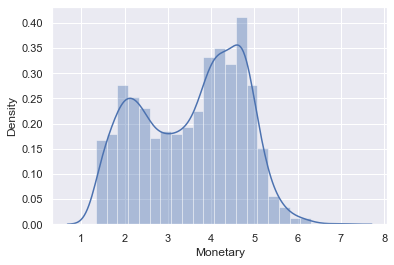

In [64]:
#Visualising data after normalisation for Monetary
Monetary_plot=Log_tfd_data['Monetary']
ax=sns.distplot(Monetary_plot)

In [65]:
#SCALING THE DATA USING SATANDARD SCALER
from sklearn.preprocessing import StandardScaler
#bring the data on same scale
scaleobj=StandardScaler()
Scaled_data=scaleobj.fit_transform(Log_tfd_data)
#Transform back to dataframe
Scaled_data=pd.DataFrame(Scaled_data, index=RFMScores.index, columns=Log_tfd_data.columns)
Scaled_data.head()


,Recency,Monetary,Frequency
0,-1.596465,2.094389,8.431282
1,-1.596465,2.023227,5.205950
2,-1.596465,1.664849,2.210999
3,-1.596465,1.632269,2.287792
4,-1.596465,1.537958,3.132522


In [66]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}
for k in range(1,15):
    km=KMeans(n_clusters=k, init='k-means++', max_iter=100)
    km=km.fit(Scaled_data)
    sum_of_sq_dist[k]=km.inertia_
    

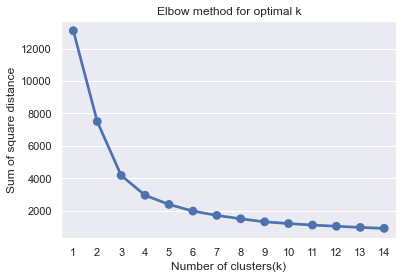

In [67]:
#Plot teh graph for the sum of square distance values and number of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of square distance')
plt.title('Elbow method for optimal k')
plt.show()

Since from the elbow method used above for choosing optimal clusters, we can se clearly that clusters should be 3, i.e K=3 be taken.

In [68]:
#Perform K-Means Clustering (KMeans Clustering Model)
KMean_clust=KMeans(n_clusters=3, init='k-means++', max_iter=100)
KMean_clust.fit(Scaled_data)

#Finding the clusters for the observations given in teh dataset
RFMScores['Cluster']=KMean_clust.labels_
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster
0,22,1,4.133333,399.551333,1,1,1,111,3,Champions,0
1,29,1,2.733333,367.532000,1,1,1,111,3,Champions,0
2,83,1,1.433333,241.989667,1,1,1,111,3,Champions,0
3,95,1,1.466667,233.075667,1,1,1,111,3,Champions,0
4,124,1,1.833333,208.781333,1,1,1,111,3,Champions,0


Text(0.5, 1.0, 'Cluster Plotting(Frequency vs Recency)')

<Figure size 720x504 with 0 Axes>

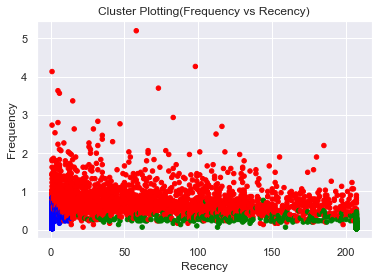

In [69]:
#Plotting the clusters in scatter plot
plt.figure(figsize=(10,7))
#Scatter Plot Frequency vs Recency
Colors=["red","green","blue"]
RFMScores["Color"]=RFMScores["Cluster"].map(lambda x:Colors[x])
ax=RFMScores.plot(kind="scatter",x="Recency",y="Frequency",c=RFMScores["Color"])
plt.title("Cluster Plotting(Frequency vs Recency)")


Text(0.5, 1.0, 'Cluster Plotting(Frequency vs Monetary)')

<Figure size 720x504 with 0 Axes>

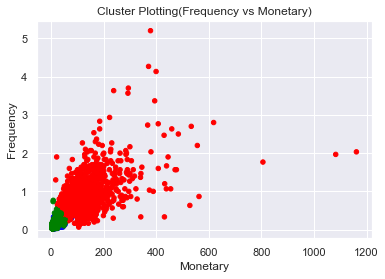

In [70]:
#Plotting the clusters in scatter plot
plt.figure(figsize=(10,7))
#Scatter Plot Frequency vs Monetary
Colors=["red","green","blue"]
RFMScores["Color"]=RFMScores["Cluster"].map(lambda x:Colors[x])
ax=RFMScores.plot(kind="scatter",x="Monetary",y="Frequency",c=RFMScores["Color"])
plt.title("Cluster Plotting(Frequency vs Monetary)")


Text(0.5, 1.0, 'Cluster Plotting(Monetary vs Recency)')

<Figure size 720x504 with 0 Axes>

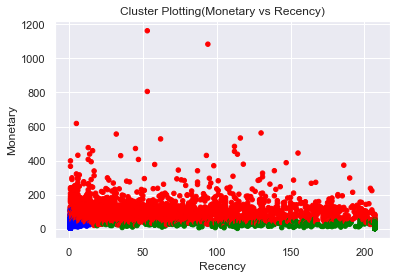

In [71]:
#Plotting the clusters in scatter plot
plt.figure(figsize=(10,7))
#Scatter Plot Monetary vs Recency
Colors=["red","green","blue"]
RFMScores["Color"]=RFMScores["Cluster"].map(lambda x:Colors[x])
ax=RFMScores.plot(kind="scatter",x="Recency",y="Monetary",c=RFMScores["Color"])
plt.title("Cluster Plotting(Monetary vs Recency)")


In [72]:
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster,Color
0,22,1,4.133333,399.551333,1,1,1,111,3,Champions,0,red
1,29,1,2.733333,367.532000,1,1,1,111,3,Champions,0,red
2,83,1,1.433333,241.989667,1,1,1,111,3,Champions,0,red
3,95,1,1.466667,233.075667,1,1,1,111,3,Champions,0,red
4,124,1,1.833333,208.781333,1,1,1,111,3,Champions,0,red


In [73]:
RFMScores.tail()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster,Color
4994,173944,207,0.033333,3.916333,4,4,4,444,12,Need_Attention,1,green
4995,173946,207,0.033333,3.916333,4,4,4,444,12,Need_Attention,1,green
4996,173987,207,0.033333,3.916333,4,4,4,444,12,Need_Attention,1,green
4997,174004,207,0.033333,3.916333,4,4,4,444,12,Need_Attention,1,green
4998,174038,207,0.033333,3.916333,4,4,4,444,12,Need_Attention,1,green


On an average KMeans Clustering has the acccuracy of 78%, Though it is not good idea to check the accuracy for the KMeans Cllustering as it is not a Classification tool. However we can optimise and take optimum value for k through Elbow method and Silhouette Analysis. Here we have used elbow method.

In [74]:
RFMScores[RFMScores['Loyalty_Level']=='Potential_Customers'].sort_values('Monetary',ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster,Color
0,2862,18,93,0.333333,431.333333,3,3,1,331,7,Potential_Customers,0,red
1,2776,32,87,0.333333,341.400000,3,3,1,331,7,Potential_Customers,0,red
2,2764,231,86,0.400000,171.315000,3,3,1,331,7,Potential_Customers,0,red
3,3809,266,178,0.200000,164.204667,3,3,1,331,7,Potential_Customers,0,red
4,2936,268,99,0.333333,164.001667,3,3,1,331,7,Potential_Customers,0,red


In [75]:
RFMScores[RFMScores['Loyalty_Level']=='Potential_Customers'].sort_values('Monetary',ascending=False).reset_index().tail()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster,Color
1171,945,108813,1,0.133333,6.982667,1,3,4,134,8,Potential_Customers,2,blue
1172,949,109822,1,0.133333,6.903000,1,3,4,134,8,Potential_Customers,2,blue
1173,960,111844,1,0.133333,6.773000,1,3,4,134,8,Potential_Customers,2,blue
1174,964,112325,1,0.133333,6.737333,1,3,4,134,8,Potential_Customers,2,blue
1175,1024,120810,1,0.133333,6.205667,1,3,4,134,8,Potential_Customers,2,blue


In [76]:
RFMScores[RFMScores['Color']=='red'].sort_values('Monetary',ascending=False).reset_index().tail()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyalty_Level,Cluster,Color
2183,1601,21586,17,0.500000,25.054667,2,2,3,223,7,Potential_Customers,0,red
2184,1965,22528,33,0.533333,24.434667,2,2,3,223,7,Potential_Customers,0,red
2185,2175,23168,45,0.666667,24.024333,2,2,3,223,7,Potential_Customers,0,red
2186,1602,28006,17,1.900000,21.322667,2,1,3,213,6,Champions,0,red
2187,3031,36880,105,1.300000,17.756333,3,1,3,313,7,Potential_Customers,0,red


# Conclusion

In [77]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


We get the tree clusters by applying K-means Clustering, Colored label as : 
1. 'Red' cluster for "Champions"
2. 'Green' cluster for "Potential_Customers"
3. 'Blue' cluster for "Need_Attention"

So from above three graphs, plotted between:
1. Frequency vs Recency
2. Monetary vs Frequency
3. Monetary vs Recency

We need to focus on engagments of "Potential_Customers";"Need_Attention" first.

#### Potential_Customers:
From the plots, it is clearly seen that Potential_customers have recency timing on an average of 10 days, and frequency is bit low varying from (0-1) and their monetary value is also between (0-100).

So we need to extend their engagments by increasing their on timings(frequency) and their purchase value.
First need to work on frequency, So for this, they can be offered some gifts or coupons according to their engagments.Best possible way can be, notifying them for the same in their online times,like maximum engagements can be seen in TIME(1801-2359)hrs, So they can notify in this time period about the offers.

To increase their frequency on an average to 4 times, the same notification can be made through messages for same times a day with a link, for the recommended products.

Later on to increase their monetary values, they can be recomended some high quality and valuable products, can be counted as according to product rating and their choices of products, and directly showing them best products reviews, in the time being of their engagments with increased frequency.
These can be ensured by getting feedbacks from them everytime they mark their presence online and offline as well.

The same can be done for "Need_Attention", with more efforts to keep them with market, as they can be future potentials, so can't be ignored.

##### As once trust is built with the customers, its necessary to keep the trust on!!
